In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Filling the missing value in column age and casting it to int for column uniformity
mean_value=train_df['Age'].mean()
train_df['Age'].fillna(value=mean_value, inplace=True)
train_df = train_df.astype({"Age": int})

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking the gender diversity of the people in the Titanic

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

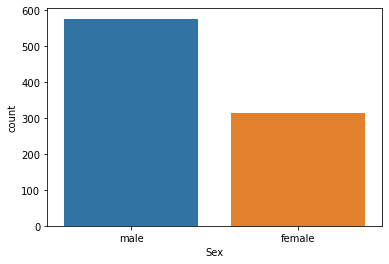

In [7]:
sns.countplot(train_df['Sex'])

## The passanger distribution among the different classes in the Titanic 
First class referes to the most well equipped zone with a lot of privileges in the ship while third class meets the bare requirements
And in the latter graph we can infer that more number of men are travelling in the third class while the other two are more or less equally distributed.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

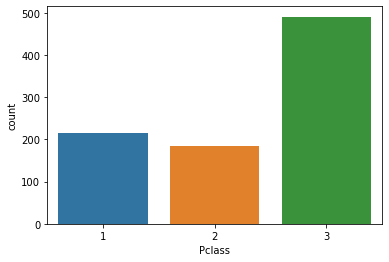

In [8]:
sns.countplot(train_df['Pclass'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

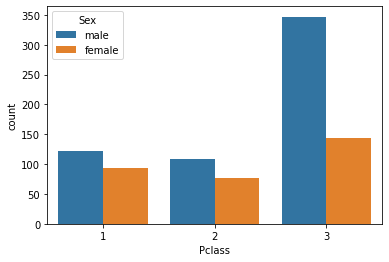

In [9]:
sns.countplot(train_df['Pclass'],hue = train_df['Sex'])

## Count of the people who have survived the ship wrek

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

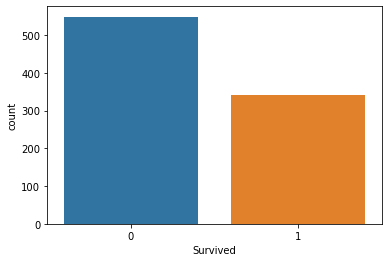

In [10]:
sns.countplot(train_df.Survived)

### Now we are checking the people who have survived based on the class division
As we can see the number of people who have survived are more in the first class on a contrary the number of people who did not survive the wrek falls under the third class
Some possible reasons are:
* The people in the first class are given high priority for evacuation while the remaining classes are given lesser priorities

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

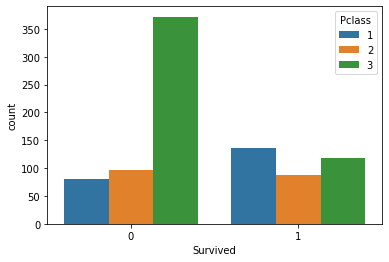

In [11]:
sns.countplot(train_df.Survived,hue=train_df.Pclass)

## Distribution of survived passangers based on gender
As we can see the female passangers are given more priority while evacuation, because of this we can see that a good percentage of women passangers are on boarded into the rescue boats.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

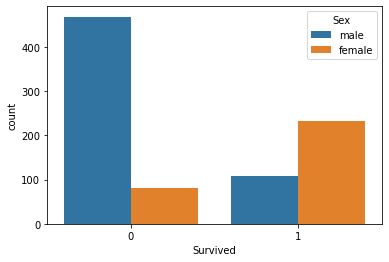

In [12]:
sns.countplot(train_df.Survived,hue=train_df.Sex)

## Subsequently lets now check how many people are travelling along with their siblings or spouse or with the family
As we can see the majority of the people have travelled are sole travellers as in context of no siblings also these folks are male and third class carries the winner medal
On Further scrolling we can see that the people who have survived the crash and people who did not make up to the shore alive are also a part of the same clan

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

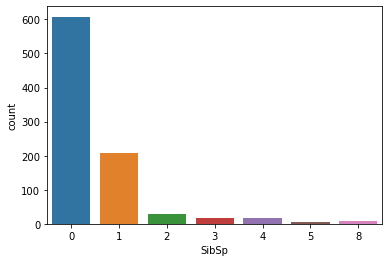

In [13]:
sns.countplot(train_df.SibSp)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

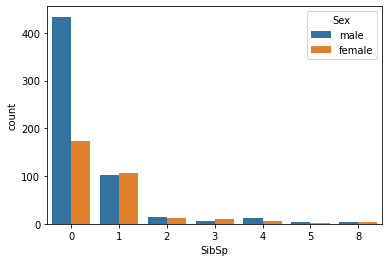

In [14]:
sns.countplot(train_df.SibSp,hue=train_df.Sex)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

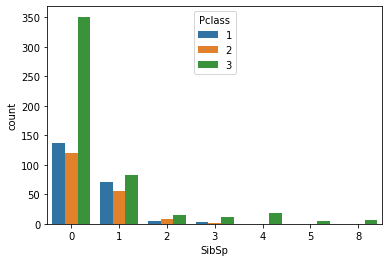

In [15]:
sns.countplot(train_df.SibSp,hue=train_df.Pclass)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

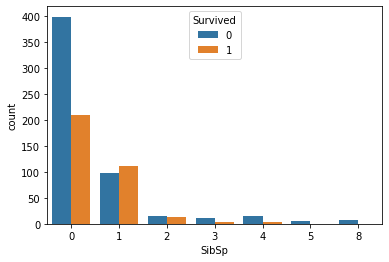

In [16]:
sns.countplot(train_df.SibSp,hue=train_df.Survived)

## Now let's take the distribution of how many passangers have travelled as a family
This graph is similar to the Siblings graphs but not the same though as they are displaying the similar distribution of not travelling class holding the first place and these travellers are male and again third class tops the rest.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

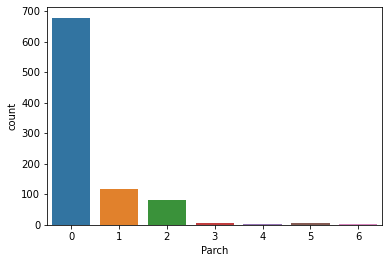

In [17]:
sns.countplot(train_df.Parch)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

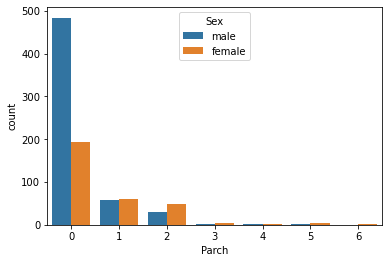

In [18]:
sns.countplot(train_df.Parch,hue=train_df.Sex)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

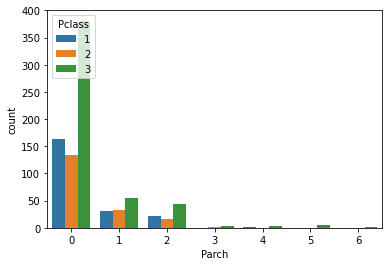

In [19]:
sns.countplot(train_df.Parch,hue=train_df.Pclass)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

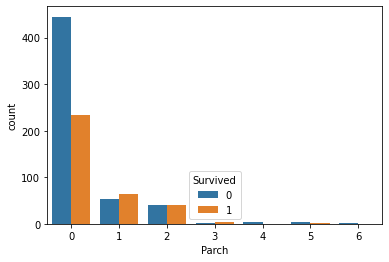

In [20]:
sns.countplot(train_df.Parch,hue=train_df.Survived)

## Embarkment of passengers into the floating vessel
We can see that the most populous port is Southampton. And as per the hue observation, we can see that the people boarded the vessel into highest numbers in all classes. This port must be a home for a lot of important trade because of which the city is populated by lot of people.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

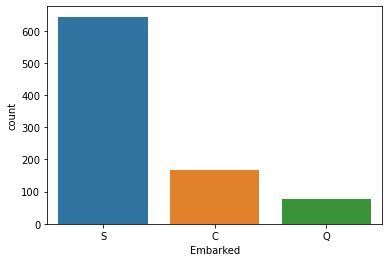

In [21]:
sns.countplot(train_df.Embarked)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

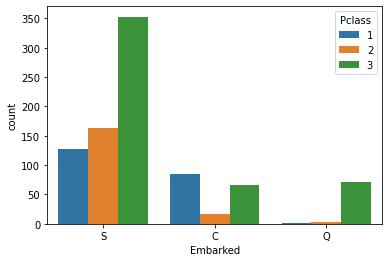

In [22]:
sns.countplot(train_df.Embarked,hue=train_df.Pclass)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

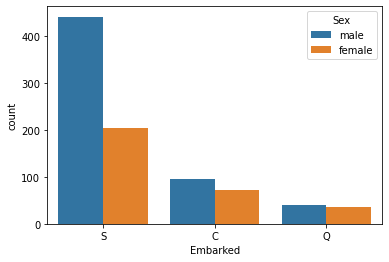

In [23]:
sns.countplot(train_df.Embarked,hue=train_df.Sex)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

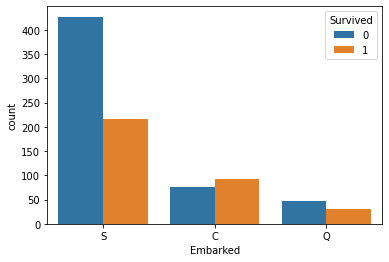

In [24]:
sns.countplot(train_df.Embarked,hue=train_df.Survived)

We can drop off the column Cabin as it contains a lot of Nan values at the same time they infer the cabin number of the passangers.
Also we can drop off the name column as we are moving to the next stage of predicting the survivers where the name column wont give a good impact or even required and same goes with the passenger id, ticket, fare, Embarked

In [25]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
test_df = test_df.drop(['Name','Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)

In [26]:
train_df.Sex = train_df.Sex.map({'male':1,'female':0})
test_df.Sex = test_df.Sex.map({'male':1,'female':0})

### Rounding the ages to the nearest 10s value to reduce the divergence in the column

In [27]:
age = [math.ceil(i/10)*10 for i in train_df.Age]
train_df = train_df.drop(['Age'],axis=1)
train_df['Age'] = age

test_df.fillna(test_df['Age'].mean(),inplace=True)
test_age = [math.ceil(i/10)*10 for i in test_df.Age]
test_df = test_df.drop(['Age'],axis=1)
test_df['Age'] = test_age

<AxesSubplot:>

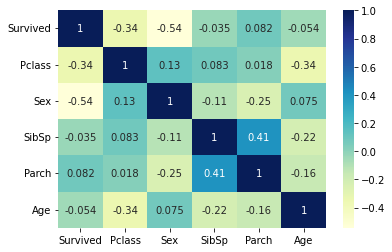

In [28]:
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)

In [29]:
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold,GridSearchCV
from scipy.stats import loguniform
from scipy.stats import randint as sp_randint

In [30]:
X = train_df.drop(['Survived'],axis=1)
y = train_df['Survived']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [32]:
log = LogisticRegression()
log.fit(X_train,y_train)
log_pred = log.predict(X_test)
log_acc = round(accuracy_score(y_test,log_pred)*100,2)
log_conf = confusion_matrix(y_test,log_pred)
print(log_acc,'\n',log_conf)

79.33 
 [[95 15]
 [22 47]]


In [35]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# space = dict()
# space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
# space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
# space['C'] = loguniform(1e-5, 100)
# search = RandomizedSearchCV(log, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# result = search.fit(X_train,y_train)
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
'''
Best Hyperparameters: {'C': 0.7855129801065908, 'penalty': 'l2', 'solver': 'liblinear'}
'''
log_tuned = LogisticRegression(C= 0.7855129801065908, penalty= 'l2', solver= 'liblinear')
log_tuned.fit(X_train,y_train)
log_tuned_pred = log_tuned.predict(X_test)
log_tuned_acc = round(accuracy_score(y_test,log_tuned_pred)*100,2)
log_tuned_conf = confusion_matrix(y_test,log_tuned_pred)
print(log_tuned_acc,'\n',log_tuned_conf)

79.33 
 [[97 13]
 [24 45]]


In [36]:
gnaive = GaussianNB()
gnaive.fit(X_train,y_train)
gnaive_pred = gnaive.predict(X_test)
gnaive_acc = round(accuracy_score(y_test,gnaive_pred)*100,2)
gnaive_conf = confusion_matrix(y_test,gnaive_pred)
print(gnaive_acc,'\n',gnaive_conf)

76.54 
 [[86 24]
 [18 51]]


In [37]:
# parameters = {  
# 'var_smoothing': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001,0.000001)  
# }  
# grid_search= GridSearchCV(gnaive, parameters)
# result = grid_search.fit(X_train,y_train)
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
'''
Best Hyperparameters: {'var_smoothing': 0.001}
'''
gnaive_tuned = GaussianNB(var_smoothing= 0.001)
gnaive_tuned.fit(X_train,y_train)
gnaive_tuned_pred = gnaive_tuned.predict(X_test)
gnaive_tuned_acc = round(accuracy_score(y_test,gnaive_tuned_pred)*100,2)
gnaive_tuned_conf = confusion_matrix(y_test,gnaive_tuned_pred)
print(gnaive_tuned_acc,'\n',gnaive_tuned_conf)

75.98 
 [[83 27]
 [16 53]]


In [38]:
naive = MultinomialNB()
naive.fit(X_train,y_train)
naive_pred = naive.predict(X_test)
naive_acc = round(accuracy_score(y_test,naive_pred)*100,2)
naive_conf = confusion_matrix(y_test,naive_pred)
print(naive_acc,'\n',naive_conf)

68.72 
 [[100  10]
 [ 46  23]]


In [39]:
# parameters = {  
# 'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
# }  
# grid_search= GridSearchCV(naive, parameters)
# result = grid_search.fit(X_train,y_train)
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
'''
Best Hyperparameters: {'alpha': 1}
'''
naive_tuned = MultinomialNB(alpha= 1)
naive_tuned.fit(X_train,y_train)
naive_tuned_pred = naive_tuned.predict(X_test)
# print(accuracy_score(y_test,naive_tuned_pred))
naive_tuned_acc = round(accuracy_score(y_test,naive_tuned_pred)*100,2)
naive_tuned_conf = confusion_matrix(y_test,naive_tuned_pred)
print(naive_tuned_acc,'\n',naive_tuned_conf)

68.72 
 [[100  10]
 [ 46  23]]


In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = round(accuracy_score(y_test,knn_pred)*100,2)
knn_conf = confusion_matrix(y_test,knn_pred)
print(knn_acc,'\n',knn_conf)

77.65 
 [[99 11]
 [29 40]]


In [65]:
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=10)
# #Fit the model
# best_model = clf.fit(X_train,y_train)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
'''
Best leaf_size: 41 Best p: 1 Best n_neighbors: 11
'''
knn_tuned = KNeighborsClassifier(leaf_size= 41,p= 1,n_neighbors= 11)
knn_tuned.fit(X_train,y_train)
knn_tuned_pred = knn_tuned.predict(X_test)
knn_tuned_acc = round(accuracy_score(y_test,knn_tuned_pred)*100,2)
knn_tuned_conf = confusion_matrix(y_test,knn_tuned_pred)
print(knn_tuned_acc,'\n',knn_tuned_conf)

77.65 
 [[95 15]
 [25 44]]


In [42]:
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)
dec_pred = dec.predict(X_test)
dec_acc = round(accuracy_score(y_test,dec_pred)*100,2)
dec_conf = confusion_matrix(y_test,dec_pred)
print(dec_acc,'\n',dec_conf)

78.21 
 [[98 12]
 [27 42]]


In [63]:
# dt_hp = DecisionTreeClassifier(random_state=43)

# params = {'max_depth':[3,5,7,10,15],
#           'min_samples_leaf':[3,5,10,15,20],
#           'min_samples_split':[8,10,12,18,20,16],
#           'criterion':['gini','entropy']}
# GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=10,n_jobs=-1, verbose=True, scoring='accuracy')
# GS.fit(X_train, y_train)
# print('Best Parameters:',GS.best_params_,end='\n\n')
# print('Best Score:',GS.best_score_)
'''
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 12}
'''
dec_tuned = DecisionTreeClassifier(random_state=43,criterion= 'gini', max_depth= 10, min_samples_leaf= 3, min_samples_split= 12)
dec_tuned.fit(X_train,y_train)
dec_tuned_pred = dec_tuned.predict(X_test)
dec_tuned_acc = round(accuracy_score(y_test,dec_tuned_pred)*100,2)
dec_tuned_conf = confusion_matrix(y_test,dec_tuned_pred)
print(dec_tuned_acc,'\n',dec_tuned_conf)

79.89 
 [[100  10]
 [ 26  43]]


In [44]:
rnf = RandomForestClassifier()
rnf.fit(X_train,y_train)
rnf_pred = rnf.predict(X_test)
rnf_acc = round(accuracy_score(y_test,rnf_pred)*100,2)
rnf_conf = confusion_matrix(y_test,rnf_pred)
print(rnf_acc,'\n',rnf_conf)

79.33 
 [[94 16]
 [21 48]]


In [61]:
# clf = RandomForestClassifier()

# param_dist = {"max_depth": [10,20,30,40,50, None],
#               "max_features": sp_randint(1, 11),
#               "min_samples_split": sp_randint(2, 11),
#               "min_samples_leaf": sp_randint(1, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"],
#              "n_estimators":[50,100,200,300,400,800,1000,1200,1600,1800,2000]
#              }

# samples = 8  # number of random samples 
# randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples,cv=3)
# randomCV.fit(X_train,y_train)
# print(randomCV.best_params_)
'''
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 400}
'''
rnf_tuned = RandomForestClassifier(bootstrap= False,criterion= 'gini', max_depth= 50, max_features= 4, min_samples_leaf=2, min_samples_split= 8, n_estimators= 400)
rnf_tuned.fit(X_train,y_train)
rnf_tuned_pred = rnf.predict(X_test)
rnf_tuned_acc = round(accuracy_score(y_test,rnf_tuned_pred)*100,2)
rnf_tuned_conf = confusion_matrix(y_test,rnf_tuned_pred)
print(rnf_tuned_acc,'\n',rnf_tuned_conf)

79.33 
 [[94 16]
 [21 48]]


In [46]:
per = Perceptron()
per.fit(X_train,y_train)
per_pred = per.predict(X_test)
per_acc = round(accuracy_score(y_test,per_pred)*100,2)
per_conf = confusion_matrix(y_test,per_pred)
print(per_acc,'\n',per_conf)

72.07 
 [[77 33]
 [17 52]]


In [47]:
# per_tuned = Perceptron()
# # define model evaluation method
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define grid
# grid = dict()
# grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# grid['penalty'] = ['l2','l1','elasticnet']

# grid['alpha'] = [0.0001,0.001,0.01,0.00001]
# # define search
# search = GridSearchCV(per_tuned, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# # perform the search
# results = search.fit(X_train,y_train)
# # summarize
# print('Mean Accuracy: %.3f' % results.best_score_)
# print('Config: %s' % results.best_params_)
'''
Config: {'alpha': 0.001, 'eta0': 0.0001, 'penalty': 'l1'}
'''
per_tuned = Perceptron(alpha= 0.001, eta0= 0.0001, penalty= 'l1')
per_tuned.fit(X_train,y_train)
per_tuned_pred = per_tuned.predict(X_test)
per_tuned_acc = round(accuracy_score(y_test,per_tuned_pred)*100,2)
per_tuned_conf = confusion_matrix(y_test,per_tuned_pred)
print(per_tuned_acc,'\n',per_tuned_conf)

77.65 
 [[94 16]
 [24 45]]


In [48]:
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
svm_acc = round(accuracy_score(y_test,svm_pred)*100,2)
svm_conf = confusion_matrix(y_test,svm_pred)
print(svm_acc,'\n',svm_conf)

62.57 
 [[109   1]
 [ 66   3]]


In [49]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear','rbf', 'sigmoid']} 
# #'poly', 'precomputed'
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_estimator_)
svm_tuned = SVC(C=10, gamma=0.001)
svm_tuned.fit(X_train,y_train)
svm_tuned_pred = svm_tuned.predict(X_test)
svm_tuned_acc = round(accuracy_score(y_test,svm_tuned_pred)*100,2)
svm_tuned_conf = confusion_matrix(y_test,svm_tuned_pred)
print(svm_tuned_acc,'\n',svm_tuned_conf)

81.01 
 [[99 11]
 [23 46]]


In [50]:
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)
xg_pred = xg.predict(X_test)
xg_acc = round(accuracy_score(y_test,xg_pred),2)*100
xg_conf = confusion_matrix(y_test,xg_pred)
print(xg_acc,'\n',xg_conf)

79.0 
 [[94 16]
 [22 47]]


In [51]:
# param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
  
# grid = GridSearchCV(xgb.XGBClassifier(tree_method='gpu_hist'), param_grid, refit = True, verbose = 3)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_estimator_)
'''
colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=1;
'''
xg_tuned = xgb.XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=1)
xg_tuned.fit(X_train,y_train)
xg_tuned_pred = xg_tuned.predict(X_test)
xg_tuned_acc = round(accuracy_score(y_test,xg_tuned_pred),2)*100
xg_tuned_conf = confusion_matrix(y_test,xg_tuned_pred)
print(xg_tuned_acc,'\n',xg_tuned_conf)

79.0 
 [[97 13]
 [25 44]]


In [52]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)
ada_acc = round(accuracy_score(y_test,ada_pred),2)*100
ada_conf = confusion_matrix(y_test,ada_pred)
print(ada_acc,'\n',ada_conf)

80.0 
 [[96 14]
 [22 47]]


In [53]:
# ada_tuned = AdaBoostClassifier()
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=ada_tuned, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# grid_result = grid_search.fit(X_train,y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
'''
Best: 0.812813 using {'learning_rate': 0.1, 'n_estimators': 500}
'''
ada_tuned = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 500)
ada_tuned.fit(X_train,y_train)
ada_tuned_pred = ada_tuned.predict(X_test)
ada_tuned_acc = round(accuracy_score(y_test,ada_tuned_pred),2)*100
ada_tuned_conf = confusion_matrix(y_test,ada_tuned_pred)
print(ada_tuned_acc,'\n',ada_tuned_conf)

81.0 
 [[96 14]
 [20 49]]


In [54]:
df = pd.DataFrame({'Models':['Logistic','GaussianNB','MultinomialNB','KNN','Decision-Tree','Random-Forest','Perceptron','SVM','XGBoost','AdaBoost'],
                   'Scores':[log_acc,gnaive_acc,naive_acc,knn_acc,dec_acc,rnf_acc,per_acc,svm_acc,xg_acc,ada_acc],
                   'Tuned_scores':[log_tuned_acc,gnaive_tuned_acc,naive_tuned_acc,knn_tuned_acc,dec_tuned_acc,rnf_tuned_acc,per_tuned_acc,svm_tuned_acc,xg_tuned_acc,ada_tuned_acc]
                  }
                 )
df

,Models,Scores,Tuned_scores
0,Logistic,79.33,79.33
1,GaussianNB,76.54,75.98
2,MultinomialNB,68.72,68.72
3,KNN,77.65,77.65
4,Decision-Tree,78.21,76.54
5,Random-Forest,79.33,79.33
6,Perceptron,72.07,77.65
7,SVM,62.57,81.01
8,XGBoost,79.00,79.00
9,AdaBoost,80.00,81.00


<AxesSubplot:xlabel='Models', ylabel='Scores'>

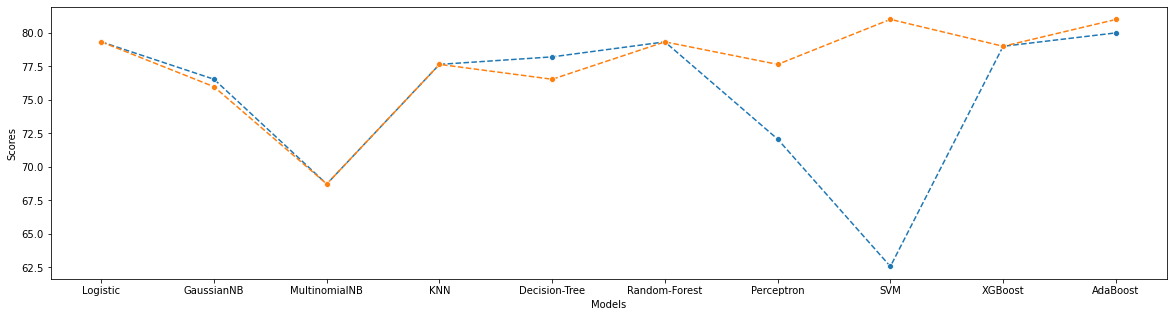

In [55]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df.Models,y=df.Scores,linestyle='--', marker="o")
sns.lineplot(x=df.Models,y=df.Tuned_scores,linestyle='--', marker="o")

## Though tuned SVM ranks as best while submission random forest has given me highest score

In [66]:
test_X = test_df.drop(['PassengerId'],axis=1)
rnf_tuned_pred = rnf_tuned.predict(test_X)

In [67]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'].tolist(),'Survived':rnf_tuned_pred})

In [68]:
submission.to_csv('Submissionsrnf.csv',index=False)

# Thanks for the visit!!